This is the code that creates the data independently in each run

In [49]:
### Some initializations
import numpy as np
import random
import loli
import pickle
from scipy.stats import binomtest
import matplotlib.pyplot as plt
import copy as copy


(array([  5.,   7.,  11.,  25.,  41.,  69.,  91., 101., 127., 126., 113.,
         96.,  76.,  58.,  29.,  16.,   7.,   0.,   1.,   1.]),
 array([-15.68784176, -14.01467289, -12.34150402, -10.66833515,
         -8.99516628,  -7.32199741,  -5.64882854,  -3.97565967,
         -2.3024908 ,  -0.62932193,   1.04384694,   2.71701581,
          4.39018468,   6.06335355,   7.73652242,   9.40969129,
         11.08286016,  12.75602903,  14.42919789,  16.10236676,
         17.77553563]),
 <BarContainer object of 20 artists>)

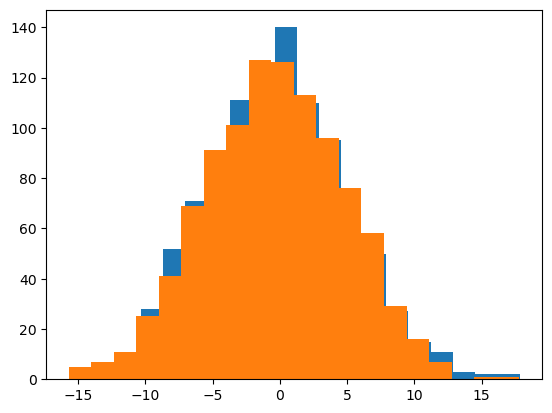

In [125]:
plt.hist(y1,bins=20)
plt.hist(y2,bins=20)

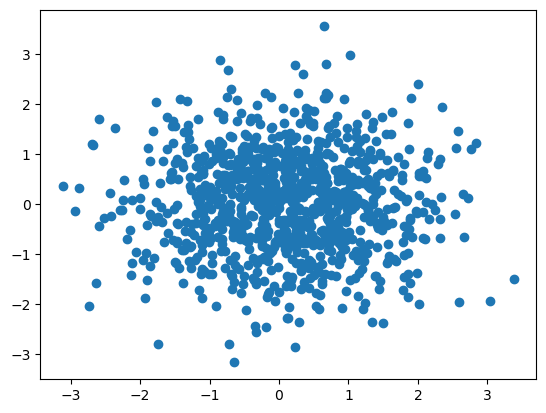

In [122]:
means=np.zeros(2)
cor=np.eye(2)
beta=np.array([-5,1])
x1=np.random.multivariate_normal(means,cor,size=1000)
x2=np.random.multivariate_normal(means,cor,size=1000)
noise1=np.random.normal(0,1,size=1000)
noise2=np.random.normal(0,1,size=1000)
y1=beta@x1.T+noise1
y2=-1*beta@x2.T+noise2
plt.scatter(x[:,0],x[:,1])

In [82]:
def lordata(size):
    X=np.zeros((size+1,6))
    X[0,:]=[1,0.97,0.99,1,0.97,0.99]
    
    
    for t in range(size):
        e=np.random.multivariate_normal(np.zeros(6),0.1*np.eye(6))
        x_new=[X[t,0]*0.9+0.1*X[t,1]+e[0],\
               0.25*X[t,0]-0.01*X[t,0]*X[t,2]+0.99*X[t,1]+0.001*X[t,4]**2+e[1],\
               0.01*X[t,0]*X[t,1]+0.9733*X[t,2]+e[2],\
               X[t,3]*0.9+0.1*X[t,4]+e[3],\
               X[t,3]*0.28-X[t,3]*X[t,5]*0.01+0.99*X[t,4]+0.0005*X[t,1]**2+e[4],\
               0.01*X[t,3]*X[t,4]+0.9733*X[t,5]+e[5]]
        X[t+1,:]=x_new

    return(X)


In [101]:
### Small scale initale testing: playing around with n reveals when the method tends to not return the empty set
# Generating coupled data

size=20000
n=35
E=300

for tar in range(6):
    fpfn=np.zeros((runs,2))
    X=lordata(size)
    dataX=[X[499+i*n:499+(i+1)*n,:] for i in range(E)]
    dataY=[X[499+i*n+1:499+(i+1)*n+1,tar] for i in range(E)]
    plausibleS=loli.gauss(dataX,dataY,l=1,alpha=0.1,lam=0,B=500,intercept=True)
    if len(plausibleS)==0:
        supphat=set()
    else:
        supphat=set.intersection(*plausibleS)
    print(tar,supphat)


0 {0, 1}
1 set()
2 {0, 1, 2}
3 {3, 4}
4 {1, 4, 5}


KeyboardInterrupt: 

In [83]:
# Generating coupled data

rs=1
np.random.seed(rs)
size=8000
n=25
E=300
runs=500
results={}
for tar in range(6):
    results[tar]={}
for j in range(runs):
    print(j)
    for tar in range(6):
        fpfn=np.zeros((runs,2))
        X=lordata(size)
        dataX=[X[499+i*n:499+(i+1)*n,:] for i in range(E)]
        dataY=[X[499+i*n+1:499+(i+1)*n+1,tar] for i in range(E)]
        plausibleS=loli.gauss(dataX,dataY,l=1,alpha=0.1,lam=0,B=500,intercept=True)
        if len(plausibleS)==0:
            supphat=set()
        else:
            supphat=set.intersection(*plausibleS)
        if tuple(supphat) in results[tar]:
            results[tar][tuple(supphat)]+=1
        else:
            results[tar][tuple(supphat)]=1

with open('LorenzResults='+str(E)+'N'+str(n)+'.pkl','wb') as f:
    pickle.dump(results, f)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [15]:
# Generating coupled data

rs=1
np.random.seed(rs)
size=9500
n=30
E=300
runs=500
results={}
for tar in range(6):
    results[tar]={}
for j in range(runs):
    print(j)
    for tar in range(6):
        fpfn=np.zeros((runs,2))
        X=lordata(size)
        dataX=[X[499+i*n:499+(i+1)*n,:] for i in range(E)]
        dataY=[X[499+i*n+1:499+(i+1)*n+1,tar] for i in range(E)]
        plausibleS=loli.gauss(dataX,dataY,l=1,alpha=0.1,lam=0,B=500,intercept=True)
        if len(plausibleS)==0:
            supphat=set()
        else:
            supphat=set.intersection(*plausibleS)
        if tuple(supphat) in results[tar]:
            results[tar][tuple(supphat)]+=1
        else:
            results[tar][tuple(supphat)]=1

with open('LorenzResults='+str(E)+'N'+str(n)+'.pkl','wb') as f:
    pickle.dump(results, f)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [106]:
E=300
n=25
with open('LorenzResults='+str(E)+'N'+str(n)+'.pkl','rb') as f:
    Lorenz25=pickle.load(f)

final=np.zeros((6,6))
for tar in range(6):
    for key in Lorenz25[tar]:
        for var in range(6):
            if var in key:
                final[tar,var]+=Lorenz25[tar][key]

print(final)
pvals=np.zeros((6,6))
for i in range(6):
    for j in range(6):
        test=binomtest(np.int32(final[i,j]),500,0.1,alternative='greater')
        pvals[i,j]=test.pvalue
print(pvals<0.05)

[[497.  69.   5.   2.   4.   4.]
 [ 27. 458. 285.  19.  25.  47.]
 [ 22. 415. 483.  17.  17.  20.]
 [  6.   4.   6. 497. 117.   9.]
 [ 49.  64.  82.  39. 435. 355.]
 [ 18.  35.  27.  51. 451. 475.]]
[[ True  True False False False False]
 [False  True  True False False False]
 [False  True  True False False False]
 [False False False  True  True False]
 [False  True  True False  True  True]
 [False False False False  True  True]]


In [111]:
E=300
n=30
with open('LorenzResults='+str(E)+'N'+str(n)+'.pkl','rb') as f:
    Lorenz30=pickle.load(f)

final=np.zeros((6,6))
for tar in range(6):
    for key in Lorenz30[tar]:
        for var in range(6):
            if var in key:
                final[tar,var]+=Lorenz30[tar][key]

print(final)
pvals=np.zeros((6,6))
for i in range(6):
    for j in range(6):
        test=binomtest(np.int32(final[i,j]),500,0.1,alternative='greater')
        pvals[i,j]=test.pvalue
print(pvals<0.05)

[[490. 132.  16.   4.  12.   9.]
 [ 54. 402. 357.  67.  86. 120.]
 [ 74. 452. 462.  32.  35.  48.]
 [  6.   8.   6. 495. 192.  12.]
 [102. 104. 164.  64. 327. 317.]
 [ 32.  59.  51. 101. 443. 443.]]
[[ True  True False False False False]
 [False  True  True  True  True  True]
 [ True  True  True False False False]
 [False False False  True  True False]
 [ True  True  True  True  True  True]
 [False False False  True  True  True]]


This is the code that splits one dataset into 5 intervals

In [14]:
### Some initializations
import numpy as np
import random
import loli
import pickle
import copy as copy


In [15]:
# Generating coupled data

rs=1
np.random.seed(rs)
size=50000
X=np.zeros((size+1,6))
X[0,:]=[1,0.97,0.99,1,0.97,0.99]


for t in range(size):
    e=np.random.multivariate_normal(np.zeros(6),0.1*np.eye(6))
    x_new=[X[t,0]*0.9+0.1*X[t,1]+e[0],\
           0.25*X[t,0]-0.01*X[t,0]*X[t,2]+0.99*X[t,1]+0.001*X[t,4]**2+e[1],\
           0.01*X[t,0]*X[t,1]+0.9733*X[t,2]+e[2],\
           X[t,3]*0.9+0.1*X[t,4]+e[3],\
           X[t,3]*0.28-X[t,3]*X[t,5]*0.01+0.99*X[t,4]+0.0005*X[t,1]**2+e[4],\
           0.01*X[t,3]*X[t,4]+0.9733*X[t,5]+e[5]]
    X[t+1,:]=x_new


In [25]:

np.random.seed(1)
E=500
n=20
d=6
runs=5
for tar in range(d):
    fpfn=np.zeros((runs,2))
    reportedS={}
    for j in range(runs):
        print('Run ',j+1,'out of ',runs,'target: ',tar)
        dataX=[]
        dataY=[]

        for e in range(E):
                p=j*n+e*n*runs
                dataX.append(X[p:p+n,:])
                dataY.append(X[p+1:p+1+n,tar])
        rs=np.random.randint(low=1,high=1000)
        plausibleS=loli.gauss(dataX,dataY,l=1,alpha=0.1,lam=0,B=500,rs=rs,intercept=False)
        if len(plausibleS)==0:
            supphat=set()
        else:
            supphat=set.intersection(*plausibleS)
        if tuple(supphat) in reportedS:
            reportedS[tuple(supphat)]+=1
        else:
            reportedS[tuple(supphat)]=1

    Lorenz={}
    Lorenz['results']=reportedS
    Lorenz['target']=tar
    Lorenz['runs']=runs
    Lorenz['samplesize']=n
    Lorenz['environments']=E

    with open('LorenzCoupledFixedRsE='+str(E)+'N'+str(n)+'tar'+str(tar)+'.pkl','wb') as f:
        pickle.dump(Lorenz, f)


Run  1 out of  5 target:  0
Run  2 out of  5 target:  0
Run  3 out of  5 target:  0
Run  4 out of  5 target:  0
Run  5 out of  5 target:  0
Run  1 out of  5 target:  1
Run  2 out of  5 target:  1
Run  3 out of  5 target:  1
Run  4 out of  5 target:  1
Run  5 out of  5 target:  1
Run  1 out of  5 target:  2
Run  2 out of  5 target:  2
Run  3 out of  5 target:  2
Run  4 out of  5 target:  2
Run  5 out of  5 target:  2
Run  1 out of  5 target:  3
Run  2 out of  5 target:  3
Run  3 out of  5 target:  3
Run  4 out of  5 target:  3
Run  5 out of  5 target:  3
Run  1 out of  5 target:  4
Run  2 out of  5 target:  4
Run  3 out of  5 target:  4
Run  4 out of  5 target:  4
Run  5 out of  5 target:  4
Run  1 out of  5 target:  5
Run  2 out of  5 target:  5
Run  3 out of  5 target:  5
Run  4 out of  5 target:  5
Run  5 out of  5 target:  5


In [28]:
# Generating uncoupled data

rs=1
np.random.seed(rs)
size=50000
X=np.zeros((size+1,6))
X[0,:]=[1,0.97,0.99,1,0.97,0.99]


for t in range(size):
    e=np.random.multivariate_normal(np.zeros(6),0.1*np.eye(6))
    x_new=[X[t,0]*0.9+0.1*X[t,1]+e[0],\
           0.25*X[t,0]-0.01*X[t,0]*X[t,2]+0.99*X[t,1]+e[1],\
           0.01*X[t,0]*X[t,1]+0.9733*X[t,2]+e[2],\
           X[t,3]*0.9+0.1*X[t,4]+e[3],\
           X[t,3]*0.28-X[t,3]*X[t,5]*0.01+0.99*X[t,4]+e[4],\
           0.01*X[t,3]*X[t,4]+0.9733*X[t,5]+e[5]]
    X[t+1,:]=x_new


In [35]:
E=500
n=20
d=6
runs=4
np.random.seed(1)
for tar in range(d):
    fpfn=np.zeros((runs,2))
    reportedS={}
    for j in range(runs):
        print('Run ',j+1,'out of ',runs,'target: ',tar)
        dataX=[]
        dataY=[]

        for e in range(E):
                p=j*n+e*n*runs
                dataX.append(X[p:p+n,:])
                dataY.append(X[p+1:p+1+n,tar])
        rs=np.random.randint(low=1,high=1000)
        plausibleS=loli.gauss(dataX,dataY,l=1,alpha=0.1,lam=0,B=500,rs=rs)
        if len(plausibleS)==0:
            supphat=set()
        else:
            supphat=set.intersection(*plausibleS)
        if tuple(supphat) in reportedS:
            reportedS[tuple(supphat)]+=1
        else:
            reportedS[tuple(supphat)]=1

    Lorenz={}
    Lorenz['results']=reportedS
    Lorenz['target']=tar
    Lorenz['runs']=runs
    Lorenz['samplesize']=n
    Lorenz['environments']=E

    with open('LorenzUncoupledFixedRsE='+str(E)+'N'+str(n)+'tar'+str(tar)+'.pkl','wb') as f:
        pickle.dump(Lorenz, f)

Run  1 out of  4 target:  0
Run  2 out of  4 target:  0
Run  3 out of  4 target:  0
Run  4 out of  4 target:  0
Run  1 out of  4 target:  1
Run  2 out of  4 target:  1
Run  3 out of  4 target:  1
Run  4 out of  4 target:  1
Run  1 out of  4 target:  2
Run  2 out of  4 target:  2
Run  3 out of  4 target:  2
Run  4 out of  4 target:  2
Run  1 out of  4 target:  3
Run  2 out of  4 target:  3
Run  3 out of  4 target:  3
Run  4 out of  4 target:  3
Run  1 out of  4 target:  4
Run  2 out of  4 target:  4
Run  3 out of  4 target:  4
Run  4 out of  4 target:  4
Run  1 out of  4 target:  5
Run  2 out of  4 target:  5
Run  3 out of  4 target:  5
Run  4 out of  4 target:  5


In [4]:
E=500
n=20
rs=1
for tar in range(6):
        
    with open('SavedResults/LorenzData/LorenzCoupledFixedRsE='+str(E)+'N'+str(n)+'tar'+str(tar)+'.pkl','rb') as f:
        reportedS=pickle.load(f)
    print(tar)
    print(reportedS)
    res=np.zeros(6)
    for key in reportedS['results']:
        for ind in key:
            res[ind]+=reportedS['results'][key]
    print(res)

0
{'results': {(0,): 4, (0, 1): 1}, 'target': 0, 'runs': 5, 'samplesize': 20, 'environments': 500}
[5. 1. 0. 0. 0. 0.]
1
{'results': {(1, 2): 1, (1,): 1, (1, 2, 4, 5): 1, (1, 2, 3, 5): 1, (1, 5): 1}, 'target': 1, 'runs': 5, 'samplesize': 20, 'environments': 500}
[0. 5. 3. 1. 1. 3.]
2
{'results': {(1, 2): 4, (2,): 1}, 'target': 2, 'runs': 5, 'samplesize': 20, 'environments': 500}
[0. 4. 5. 0. 0. 0.]
3
{'results': {(3,): 5}, 'target': 3, 'runs': 5, 'samplesize': 20, 'environments': 500}
[0. 0. 0. 5. 0. 0.]
4
{'results': {(2, 4, 5): 3, (): 2}, 'target': 4, 'runs': 5, 'samplesize': 20, 'environments': 500}
[0. 0. 3. 0. 3. 3.]
5
{'results': {(): 1, (4, 5): 3, (0, 1, 3, 4, 5): 1}, 'target': 5, 'runs': 5, 'samplesize': 20, 'environments': 500}
[1. 1. 0. 1. 4. 4.]


In [6]:
E=500
n=20
rs=1
for tar in range(6):
        
    with open('SavedResults/LorenzData/LorenzUncoupledFixedRsE='+str(E)+'N'+str(n)+'tar'+str(tar)+'.pkl','rb') as f:
        reportedS=pickle.load(f)
    print(tar)
    print(reportedS)
    res=np.zeros(6)
    for key in reportedS['results']:
        for ind in key:
            res[ind]+=reportedS['results'][key]
    print(res)

0
{'results': {(0,): 4, (): 1}, 'target': 0, 'runs': 5, 'samplesize': 20, 'environments': 500}
[4. 0. 0. 0. 0. 0.]
1
{'results': {(1,): 4, (1, 2): 1}, 'target': 1, 'runs': 5, 'samplesize': 20, 'environments': 500}
[0. 5. 1. 0. 0. 0.]
2
{'results': {(1, 2): 2, (2,): 2, (): 1}, 'target': 2, 'runs': 5, 'samplesize': 20, 'environments': 500}
[0. 2. 4. 0. 0. 0.]
3
{'results': {(3,): 5}, 'target': 3, 'runs': 5, 'samplesize': 20, 'environments': 500}
[0. 0. 0. 5. 0. 0.]
4
{'results': {(4, 5): 3, (1, 3, 4, 5): 1, (0, 4, 5): 1}, 'target': 4, 'runs': 5, 'samplesize': 20, 'environments': 500}
[1. 1. 0. 1. 5. 5.]
5
{'results': {(4, 5): 5}, 'target': 5, 'runs': 5, 'samplesize': 20, 'environments': 500}
[0. 0. 0. 0. 5. 5.]
